In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Existen 32 datos de diferentes años para el PIB per cápita de México
#De acuerdo al data frame, las variables que contiene cada vector de datos son las siguientes: Entidad, Código, Año y PIB per cápita
#Entidad : str, Código : str, Año : int, PIB : float
df = pd.read_csv("gdp-per-capita-worldbank.csv")
df_mex = df[df['Code']=='MEX']
print(df_mex.describe())
print(df_mex)


              Year  GDP per capita, PPP (constant 2017 international $)
count    32.000000                                          32.000000  
mean   2005.500000                                       17833.381938  
std       9.380832                                        1444.738328  
min    1990.000000                                       15087.590000  
25%    1997.750000                                       17043.435750  
50%    2005.500000                                       17913.158000  
75%    2013.250000                                       18840.095000  
max    2021.000000                                       20278.217000  
      Entity Code  Year  GDP per capita, PPP (constant 2017 international $)
3679  Mexico  MEX  1990                                          15355.628  
3680  Mexico  MEX  1991                                          15689.659  
3681  Mexico  MEX  1992                                          15931.482  
3682  Mexico  MEX  1993                     

In [5]:
#Lo que representa cada variable es indicado por su nombre:
#Entidad es el país de los respectivos datos
#Código es una abreviación del país
#Año es el año al que pertenecen los datos
#PIB per cápita es el producto interno bruto por persona
print(f"Min año: {df_mex['Year'].min()}, max año: {df_mex['Year'].max()}")
print(f"Min PIB: {df_mex['GDP per capita, PPP (constant 2017 international $)'].min()}, max PIB: {df_mex['GDP per capita, PPP (constant 2017 international $)'].max()}")
#El data frame abarca de 1990 a 2021 y PIB per cápita mínimo es de 15,087.59 y el máximo de 20,287.217

Min año: 1990, max año: 2021
Min PIB: 15087.59, max PIB: 20278.217


In [8]:
print(f"Año\nMedia: {df_mex['Year'].mean()}\nMediana: {df_mex['Year'].median()}\nDesviación estandar: {df_mex['Year'].std()}\n")
print(f"PIB per cápita\nMedia: {df_mex['GDP per capita, PPP (constant 2017 international $)'].mean()}\nMediana: {df_mex['GDP per capita, PPP (constant 2017 international $)'].median()}\nDesviación estandar: {df_mex['GDP per capita, PPP (constant 2017 international $)'].std()}")
#La media y mediana del año nos indica el año que central del rango, aunque siendo una variable cíclica y determinada no se puede extraer mucha información
#La media del PIB per cápita corresponde con la media de los años.
#La desviación estandar no indica que la variabilidad entre los datos ha sido prominente a causa del desarrollo económico del país.


Año
Media: 2005.5
Mediana: 2005.5
Desviación estandar: 9.38083151964686

PIB per cápita
Media: 17833.381937500002
Mediana: 17913.158
Desviación estandar: 1444.7383281299326


<Axes: xlabel='Entity', ylabel='GDP per capita, PPP (constant 2017 international $)'>

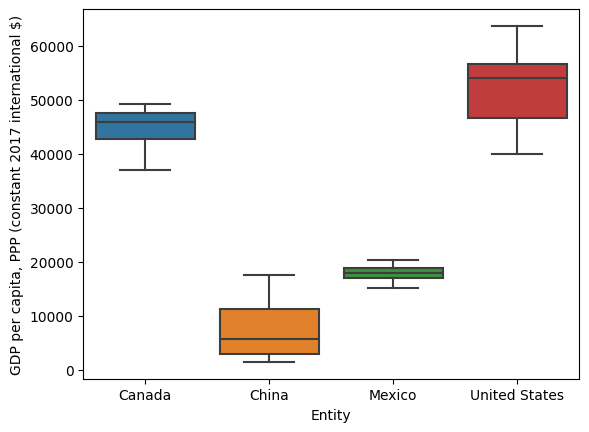

In [15]:
paises = ["MEX", "CAN", "USA", "CHN"]
df_paises = df[df['Code'].isin(paises)]
sns.boxplot(data = df_paises, y = 'GDP per capita, PPP (constant 2017 international $)', x ='Entity')

<ipython-input-16-7526cc1d450b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_paises.corr()


<Axes: >

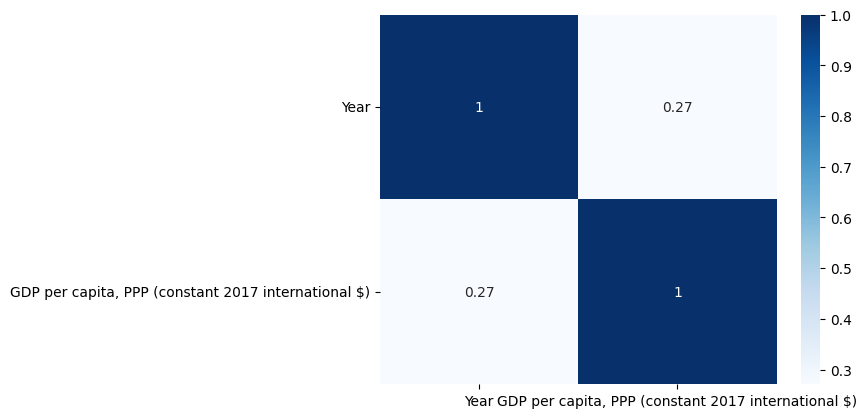

In [16]:
corr = df_paises.corr()
sns.heatmap(data = corr, cmap = 'Blues', annot=True)

Text(0.5, 1.0, 'Histograma: PIB per cápita')

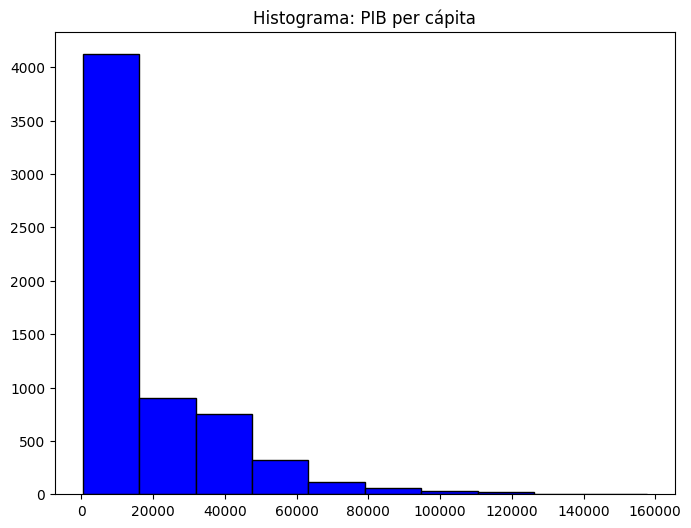

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.hist(df['GDP per capita, PPP (constant 2017 international $)'], bins=10, color='blue', edgecolor='black')
plt.title('Histograma: PIB per cápita')

In [26]:
result = df_paises.groupby('Entity')['GDP per capita, PPP (constant 2017 international $)'].agg(['max', 'min'])
print(result)


                     max         min
Entity                              
Canada         49171.510  36910.4770
China          17602.695   1423.8964
Mexico         20278.217  15087.5900
United States  63669.710  39876.0160


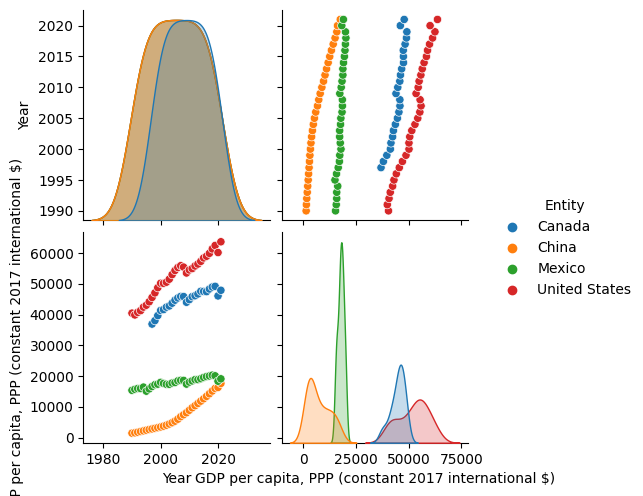

In [27]:
sns.pairplot(data = df_paises, hue = 'Entity')